# Build electrode-specific resistance curves

Start with full cell resistance data; decompose the data into cathode and anode resistance curves.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os, sys
from scipy import interpolate

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

from src import modelutils as modelutils

In [2]:
df = pd.read_csv('data/processed/hppc_1.csv')
res_dict = modelutils.decompose_resistance_curve(df['capacity'].values, df['resistance_10s_ohm'].values)

rp = res_dict['resistance_cathode']
rn = res_dict['resistance_other']
qq = res_dict['capacity_expanded']
rf = res_dict['resistance_full_modeled']

In [3]:
# Data source: data/processed/hppc_1.csv

res_p = np.array([0.08179587, 0.05349805, 0.02520035, 0.01853486, 0.01554122,
       0.01360811, 0.01241951, 0.01167911, 0.01119615, 0.0111314 ,
       0.0111314 , 0.0111314 , 0.0111314 , 0.0111314 , 0.0111314 ,
       0.0111314 , 0.0111314 , 0.0111314 , 0.0111314 , 0.0111314 ,
       0.0111314 , 0.0111314 , 0.0111314 , 0.0111314 , 0.0111314 ,
       0.0111314 , 0.0111314 ])

theta_p = np.linspace(1, 0, len(res_p))

f_res_p = interpolate.interp1d(theta_p, res_p, kind='quadratic')


res_n = np.array([0.0047706 , 0.0047706 , 0.0047706 , 0.0047706 , 0.0047706 ,
       0.0047706 , 0.0047706 , 0.0047706 , 0.0047706 , 0.0047706 ,
       0.00464267, 0.00477042, 0.00493099, 0.00531774, 0.00638144,
       0.00599402, 0.00467134, 0.00435176, 0.00431948, 0.00428838,
       0.00425448, 0.00432057, 0.00435294, 0.00428712, 0.00444787,
       0.0044497 , 0.00458338])

theta_n = np.linspace(0, 1, len(res_n))

f_res_n = interpolate.interp1d(theta_n, res_n, kind='quadratic')

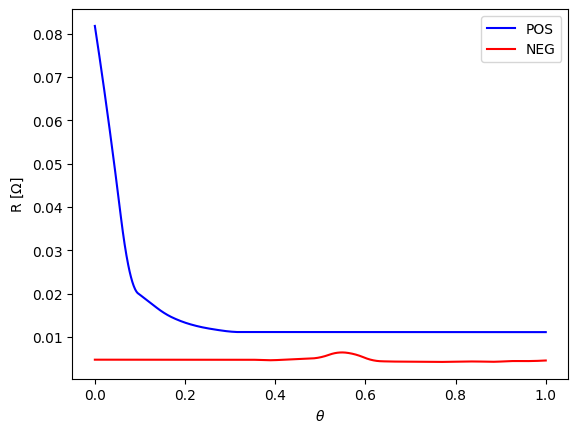

In [4]:
theta = np.linspace(0, 1, 1000)

plt.figure()
plt.plot(1-theta, f_res_p(theta), label='POS', c='b')
plt.plot(theta, f_res_n(theta), label='NEG', c='r')
plt.xlabel(r'$\theta$')
plt.ylabel(r'R [$\Omega$]')
plt.legend()
plt.show()